In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df=pd.read_csv("mom_df_ref")

In [2]:
df.head()

,Date,time,Sender,Message
0,2023년 9월 14일,15:00,원명,수업 중이에요??
1,2023년 9월 14일,15:00,원명,엄마
2,2023년 9월 14일,16:00,원명,elsis
3,2023년 9월 24일,15:00,원명,전화할게요
4,2023년 9월 24일,15:00,원명,?


In [3]:
df['time'] = df["time"].apply(lambda x : x.split(":")[0])
message_count = df.groupby('time').size()

In [4]:
message_count

time
08     7
09     9
10    20
11    15
12     2
13    32
14    17
15    19
16    14
17    51
18    29
19    15
20     5
21    13
22     6
23     3
24    14
dtype: int64

In [5]:

times = message_count.index
counts = message_count.values

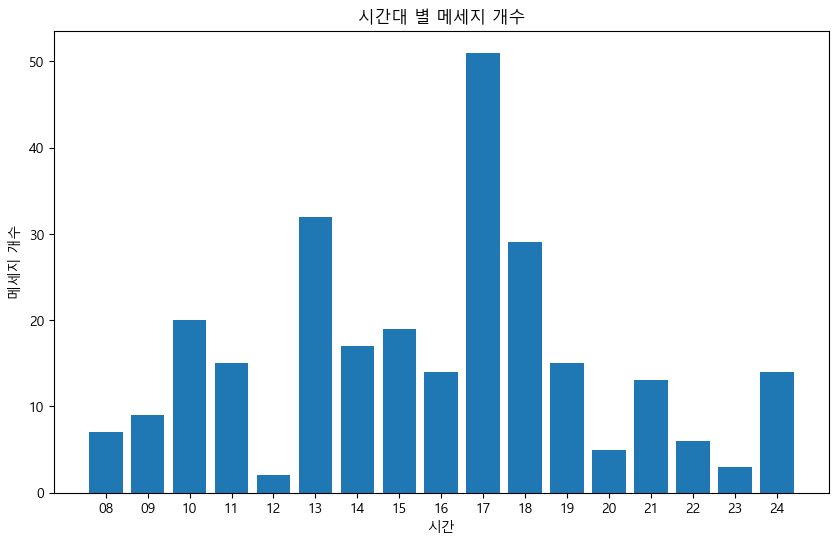

In [6]:
plt.figure(figsize=(10,6))
plt.bar(times,counts)
plt.title("시간대 별 메세지 개수")
plt.ylabel("메세지 개수")
plt.xlabel("시간")
plt.show()

In [7]:
df

,Date,time,Sender,Message
0,2023년 9월 14일,15,원명,수업 중이에요??
1,2023년 9월 14일,15,원명,엄마
2,2023년 9월 14일,16,원명,elsis
3,2023년 9월 24일,15,원명,전화할게요
4,2023년 9월 24일,15,원명,?
...,...,...,...,...
266,2024년 3월 20일,13,원명,엄마도 점심 맛있게 먹어요
267,2024년 4월 9일,18,원명,그냥 집에서 있는거에 먹어요
268,2024년 4월 18일,21,원명,네
269,2024년 4월 24일,08,원명,먹었어요


In [8]:
# df = df[~df['Message'].str.contains('보이스톡|사진|동영상')]

In [9]:
df

,Date,time,Sender,Message
0,2023년 9월 14일,15,원명,수업 중이에요??
1,2023년 9월 14일,15,원명,엄마
2,2023년 9월 14일,16,원명,elsis
3,2023년 9월 24일,15,원명,전화할게요
4,2023년 9월 24일,15,원명,?
...,...,...,...,...
266,2024년 3월 20일,13,원명,엄마도 점심 맛있게 먹어요
267,2024년 4월 9일,18,원명,그냥 집에서 있는거에 먹어요
268,2024년 4월 18일,21,원명,네
269,2024년 4월 24일,08,원명,먹었어요


In [10]:

df['Date']=df['Date'].apply(lambda x: ''.join(filter(str.isdigit, x))) + df['time'].astype(str)
# group_df=df.groupby('Date')
# for name, group in group_df:
#     print("Date:", name)
#     print(group)
#     print()

In [11]:
df

,Date,time,Sender,Message
0,202391415,15,원명,수업 중이에요??
1,202391415,15,원명,엄마
2,202391416,16,원명,elsis
3,202392415,15,원명,전화할게요
4,202392415,15,원명,?
...,...,...,...,...
266,202432013,13,원명,엄마도 점심 맛있게 먹어요
267,20244918,18,원명,그냥 집에서 있는거에 먹어요
268,202441821,21,원명,네
269,202442408,08,원명,먹었어요


In [12]:
with open("C:\\Users\\wmk51\\fraudDetection\\stopwords-ko.txt", 'r', encoding='utf-8') as file:
    kor_stopword = file.readlines()
kor_stopwords=[]
for word in kor_stopword:
    kor_stopwords.append(word.replace("\n",""))


In [13]:
#존댓말의 유무를 데이터 전처리하는 과정
from kiwipiepy import Kiwi

kiwi = Kiwi()
formal_tokens = [
    line.strip() for line in open("C:\\Users\\wmk51\\fraudDetection\\kiwi_formal_token.txt", "r", encoding="utf-8")
]

def tokenize_kiwi(sentence: str):
    return [(i.form, i.tag) for i in kiwi.tokenize(sentence)]


def is_formal_token(text):
    
    for i in tokenize_kiwi(text):
        if str(i) in formal_tokens:
            return True
    return False

In [14]:
k=kiwi.tokenize(df['Message'][11])

In [15]:
k

[Token(form='??', tag='SF', start=0, len=2)]

In [16]:
# 글자 단위로 카운트
num_words = []



#number of unique words in the text
# 단어 당 의미에 의미가 있는 데이터이기 때문에 
df["num_unique_words"] = df['Message'].apply(lambda x: len(kiwi.tokenize(x)))

#number of stopwords in the text
df['num_stopwords'] = df['Message'].apply(lambda x : len([w for w in kiwi.tokenize(x) if w[0] in kor_stopwords]))

#존댓말 유무
df['polite_text'] = df['Message'].apply(lambda x : is_formal_token(x))

#품사 태깅
df['tags'] = df['Message'].apply(lambda x : [token[1] for token in tokenize_kiwi(x)])

#부호,외국어,특수문자 컬럼(tags에서 S로 시작)
df['has_S_series'] = df['tags'].apply(lambda x: 1 if any(tag.startswith('S') for tag in x) else 0)

#웹(이메일,URL,맨션,해시태그,일련번호 ) 개수(tags에서 W로 시)
df['has_W_series'] = df['tags'].apply(lambda x: 1 if any(tag.startswith('W') for tag in x) else 0)

In [17]:
df

,Date,time,Sender,Message,num_unique_words,num_stopwords,polite_text,tags,has_S_series,has_W_series
0,202391415,15,원명,수업 중이에요??,5,1,True,"[NNG, NNB, VCP, EF, SF]",1,0
1,202391415,15,원명,엄마,1,0,False,[NNG],0,0
2,202391416,16,원명,elsis,1,0,False,[SL],1,0
3,202392415,15,원명,전화할게요,3,1,True,"[NNG, XSV, EF]",0,0
4,202392415,15,원명,?,1,0,False,[SF],1,0
...,...,...,...,...,...,...,...,...,...,...
266,202432013,13,원명,엄마도 점심 맛있게 먹어요,7,0,True,"[NNG, JX, NNG, VA, EC, VV, EF]",0,0
267,20244918,18,원명,그냥 집에서 있는거에 먹어요,11,3,True,"[MAG, NNG, JKB, VV, EC, VX, ETM, NNB, JKB, VV,...",0,0
268,202441821,21,원명,네,1,1,True,[IC],0,0
269,202442408,08,원명,먹었어요,3,0,True,"[VV, EP, EF]",0,0


In [18]:
df.shape


(271, 10)

In [19]:
df = df[~df['Message'].str.contains('보이스톡|사진|동영상')]

In [20]:
df.set_index('Date')

,time,Sender,Message,num_unique_words,num_stopwords,polite_text,tags,has_S_series,has_W_series
Date,,,,,,,,,
202391415,15,원명,수업 중이에요??,5,1,True,"[NNG, NNB, VCP, EF, SF]",1,0
202391415,15,원명,엄마,1,0,False,[NNG],0,0
202391416,16,원명,elsis,1,0,False,[SL],1,0
202392415,15,원명,전화할게요,3,1,True,"[NNG, XSV, EF]",0,0
202392415,15,원명,?,1,0,False,[SF],1,0
...,...,...,...,...,...,...,...,...,...
202432013,13,원명,엄마도 점심 맛있게 먹어요,7,0,True,"[NNG, JX, NNG, VA, EC, VV, EF]",0,0
20244918,18,원명,그냥 집에서 있는거에 먹어요,11,3,True,"[MAG, NNG, JKB, VV, EC, VX, ETM, NNB, JKB, VV,...",0,0
202441821,21,원명,네,1,1,True,[IC],0,0
